## Pengujian

### Import Library and model

In [71]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from ffnn import FFNN 
import matplotlib.pyplot as plt

def create_model(input_size, output_size, hidden_layers, activations, loss_function, weight_init):
    layer_sizes = [input_size] + hidden_layers + [output_size]
    
    model = FFNN(
        layer_sizes=layer_sizes,
        activation_functions=activations,
        loss_function=loss_function,
        weight_initialization=weight_init,
        weight_init_params={'seed': 42}
    )
    
    return model

### Export Dataset

In [10]:
def load_data(dataset_name="mnist_784"):
    print(f"Loading {dataset_name} dataset...")

    X, y = fetch_openml(dataset_name, version=1, return_X_y=True, as_frame=False)
    
    if y.dtype == object:
        y = y.astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    encoder = OneHotEncoder(sparse_output=False)
    y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test_encoded = encoder.transform(y_test.reshape(-1, 1))
    
    print(f"Data loaded. Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
    
    return X_train, X_test, y_train_encoded, y_test_encoded, y_train, y_test

X_train, X_test, y_train_encoded, y_test_encoded, y_train_original, y_test_original = load_data("mnist_784")
input_size = X_train.shape[1]
output_size = y_train_encoded.shape[1]


Loading mnist_784 dataset...
Data loaded. Training samples: 56000, Test samples: 14000


### Pengaruh depth (banyak layer) dan width (banyak neuron per layer)

In [45]:
modelDepth1 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelDepth2 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128, 128],
        activations=['relu', 'relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelDepth3 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128, 128, 128],
        activations=['relu', 'relu', 'relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelWidth1 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[16],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelWidth2 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[32],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelWidth3 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[64],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )


2025-03-18 01:32:56,308 - FFNN_1939549250976 - INFO - Logger initialized
2025-03-18 01:32:56,308 - FFNN_1939549250976 - INFO - Initializing FFNN with 3 layers: [784, 128, 10]
2025-03-18 01:32:56,311 - FFNN_1939549250976 - INFO - Activation functions: ['relu', 'softmax']
2025-03-18 01:32:56,312 - FFNN_1939549250976 - INFO - Loss function: categorical_crossentropy
2025-03-18 01:32:56,312 - FFNN_1939549250976 - INFO - Weight initialization method: he
2025-03-18 01:32:56,313 - FFNN_1939549250976 - INFO - Initializing weights using he method with params {'seed': 42}
2025-03-18 01:32:56,333 - FFNN_1939541214080 - INFO - Logger initialized
2025-03-18 01:32:56,334 - FFNN_1939541214080 - INFO - Initializing FFNN with 4 layers: [784, 128, 128, 10]
2025-03-18 01:32:56,335 - FFNN_1939541214080 - INFO - Activation functions: ['relu', 'relu', 'softmax']
2025-03-18 01:32:56,336 - FFNN_1939541214080 - INFO - Loss function: categorical_crossentropy
2025-03-18 01:32:56,337 - FFNN_1939541214080 - INFO - 

In [49]:
history1 = modelDepth1.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

history2 = modelDepth2.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

history3 = modelDepth3.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

history4 = modelWidth1.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

history5 = modelWidth2.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

history6 = modelWidth3.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

2025-03-18 01:38:18,432 - FFNN_1939549250976 - INFO - Training started with 56000 samples, batch size: 32, learning rate: 0.01, epochs: 10
2025-03-18 01:38:18,433 - FFNN_1939549250976 - INFO - Epoch 1/10 started
2025-03-18 01:38:18,599 - FFNN_1939549250976 - INFO - Epoch 1, Batch 1/1750: loss = 0.431206, time = 0.006s
2025-03-18 01:38:19,133 - FFNN_1939549250976 - INFO - Epoch 1, Batch 176/1750: loss = 0.424273, time = 0.004s
2025-03-18 01:38:19,706 - FFNN_1939549250976 - INFO - Epoch 1, Batch 351/1750: loss = 0.322336, time = 0.004s
2025-03-18 01:38:20,270 - FFNN_1939549250976 - INFO - Epoch 1, Batch 526/1750: loss = 0.421475, time = 0.003s
2025-03-18 01:38:20,939 - FFNN_1939549250976 - INFO - Epoch 1, Batch 701/1750: loss = 0.238840, time = 0.003s
2025-03-18 01:38:21,494 - FFNN_1939549250976 - INFO - Epoch 1, Batch 876/1750: loss = 0.172898, time = 0.003s
2025-03-18 01:38:22,025 - FFNN_1939549250976 - INFO - Epoch 1, Batch 1051/1750: loss = 0.395479, time = 0.003s
2025-03-18 01:38:22

2025-03-18 01:57:34,021 - FFNN_1939549250976 - INFO - Predicting for 14000 samples
2025-03-18 01:57:34,210 - FFNN_1939549250976 - INFO - Prediction completed in 0.187s



=== Perbandingan Akurasi ===


2025-03-18 01:57:34,213 - FFNN_1939541214080 - INFO - Predicting for 14000 samples
2025-03-18 01:57:34,435 - FFNN_1939541214080 - INFO - Prediction completed in 0.221s
2025-03-18 01:57:34,438 - FFNN_1939540458480 - INFO - Predicting for 14000 samples
2025-03-18 01:57:34,683 - FFNN_1939540458480 - INFO - Prediction completed in 0.245s
2025-03-18 01:57:34,688 - FFNN_1939549349040 - INFO - Predicting for 14000 samples
2025-03-18 01:57:34,724 - FFNN_1939549349040 - INFO - Prediction completed in 0.035s
2025-03-18 01:57:34,727 - FFNN_1939541225168 - INFO - Predicting for 14000 samples
2025-03-18 01:57:34,778 - FFNN_1939541225168 - INFO - Prediction completed in 0.050s
2025-03-18 01:57:34,782 - FFNN_1939549656976 - INFO - Predicting for 14000 samples
2025-03-18 01:57:34,877 - FFNN_1939549656976 - INFO - Prediction completed in 0.093s


Variasi Depth (Width = 128):
Depth 1: 0.9124
Depth 2: 0.9209
Depth 3: 0.9244
Variasi Width (Depth = 1):
Width 16: 0.8714
Width 32: 0.8815
Width 64: 0.8892

=== Grafik Loss ===


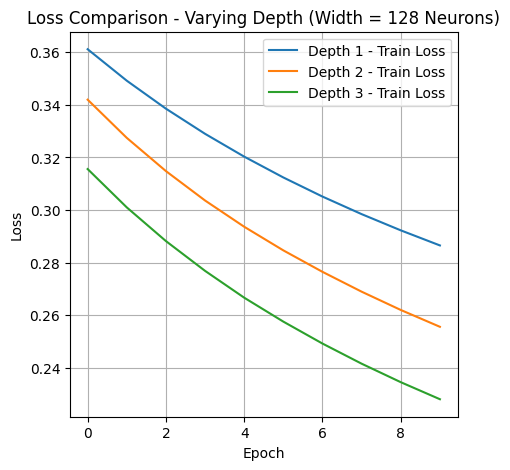

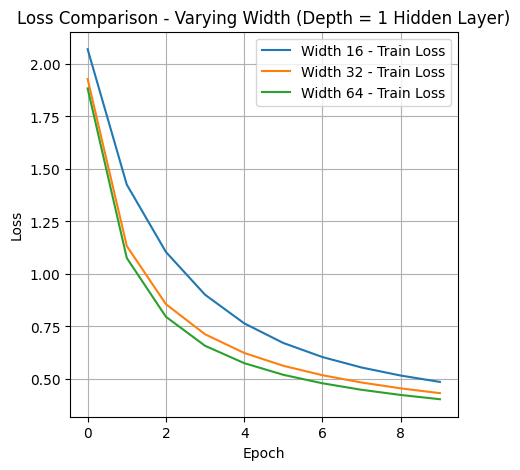

In [56]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    return accuracy

def plot_loss_comparison(histories, labels, title):
    plt.figure(figsize=(5, 5))
    for history, label in zip(histories, labels):
        plt.plot(history, label=f'{label} - Train Loss') 
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n=== Perbandingan Akurasi ===")
acc_depth1 = evaluate_model(modelDepth1, X_test, y_test_encoded)
acc_depth2 = evaluate_model(modelDepth2, X_test, y_test_encoded)
acc_depth3 = evaluate_model(modelDepth3, X_test, y_test_encoded)
acc_width1 = evaluate_model(modelWidth1, X_test, y_test_encoded)
acc_width2 = evaluate_model(modelWidth2, X_test, y_test_encoded)
acc_width3 = evaluate_model(modelWidth3, X_test, y_test_encoded)

print("Variasi Depth (Width = 128):")
print(f"Depth 1: {acc_depth1:.4f}")
print(f"Depth 2: {acc_depth2:.4f}")
print(f"Depth 3: {acc_depth3:.4f}")
print("Variasi Width (Depth = 1):")
print(f"Width 16: {acc_width1:.4f}")
print(f"Width 32: {acc_width2:.4f}")
print(f"Width 64: {acc_width3:.4f}")

depth_histories = [history1['train_loss'], history2['train_loss'], history3['train_loss']]
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3']
width_histories = [history4['train_loss'], history5['train_loss'], history6['train_loss']]
width_labels = ['Width 16', 'Width 32', 'Width 64']

print("\n=== Grafik Loss ===")
plot_loss_comparison(depth_histories, depth_labels, 'Loss Comparison - Varying Depth (Width = 128 Neurons)')
plot_loss_comparison(width_histories, width_labels, 'Loss Comparison - Varying Width (Depth = 1 Hidden Layer)')

### Pengaruh fungsi aktivasi hidden layer

In [57]:
modelRelu = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelLinear = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['linear', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelSigmoid = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['sigmoid', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelTanh = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['tanh', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )


2025-03-18 02:04:24,210 - FFNN_1939541280384 - INFO - Logger initialized
2025-03-18 02:04:24,211 - FFNN_1939541280384 - INFO - Initializing FFNN with 3 layers: [784, 128, 10]
2025-03-18 02:04:24,212 - FFNN_1939541280384 - INFO - Activation functions: ['relu', 'softmax']
2025-03-18 02:04:24,213 - FFNN_1939541280384 - INFO - Loss function: categorical_crossentropy
2025-03-18 02:04:24,215 - FFNN_1939541280384 - INFO - Weight initialization method: he
2025-03-18 02:04:24,216 - FFNN_1939541280384 - INFO - Initializing weights using he method with params {'seed': 42}
2025-03-18 02:04:24,225 - FFNN_1939541459600 - INFO - Logger initialized
2025-03-18 02:04:24,226 - FFNN_1939541459600 - INFO - Initializing FFNN with 3 layers: [784, 128, 10]
2025-03-18 02:04:24,227 - FFNN_1939541459600 - INFO - Activation functions: ['linear', 'softmax']
2025-03-18 02:04:24,229 - FFNN_1939541459600 - INFO - Loss function: categorical_crossentropy
2025-03-18 02:04:24,230 - FFNN_1939541459600 - INFO - Weight init

In [58]:
historyAct1 = modelRelu.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyAct2 = modelLinear.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyAct3 = modelSigmoid.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyAct4 = modelTanh.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )


2025-03-18 02:05:41,465 - FFNN_1939541280384 - INFO - Training started with 56000 samples, batch size: 32, learning rate: 0.01, epochs: 10
2025-03-18 02:05:41,466 - FFNN_1939541280384 - INFO - Epoch 1/10 started
2025-03-18 02:05:41,754 - FFNN_1939541280384 - INFO - Epoch 1, Batch 1/1750: loss = 2.599615, time = 0.004s
2025-03-18 02:05:42,291 - FFNN_1939541280384 - INFO - Epoch 1, Batch 176/1750: loss = 2.374618, time = 0.002s
2025-03-18 02:05:42,814 - FFNN_1939541280384 - INFO - Epoch 1, Batch 351/1750: loss = 2.194234, time = 0.003s
2025-03-18 02:05:43,337 - FFNN_1939541280384 - INFO - Epoch 1, Batch 526/1750: loss = 2.419441, time = 0.003s
2025-03-18 02:05:43,878 - FFNN_1939541280384 - INFO - Epoch 1, Batch 701/1750: loss = 2.168193, time = 0.003s
2025-03-18 02:05:44,423 - FFNN_1939541280384 - INFO - Epoch 1, Batch 876/1750: loss = 1.637535, time = 0.003s
2025-03-18 02:05:44,946 - FFNN_1939541280384 - INFO - Epoch 1, Batch 1051/1750: loss = 1.586957, time = 0.002s
2025-03-18 02:05:45

2025-03-18 02:21:14,421 - FFNN_1939541280384 - INFO - Predicting for 14000 samples
2025-03-18 02:21:14,577 - FFNN_1939541280384 - INFO - Prediction completed in 0.155s
2025-03-18 02:21:14,581 - FFNN_1939541459600 - INFO - Predicting for 14000 samples



=== Perbandingan Akurasi ===


2025-03-18 02:21:14,711 - FFNN_1939541459600 - INFO - Prediction completed in 0.129s
2025-03-18 02:21:14,714 - FFNN_1939572338240 - INFO - Predicting for 14000 samples
2025-03-18 02:21:14,874 - FFNN_1939572338240 - INFO - Prediction completed in 0.159s
2025-03-18 02:21:14,877 - FFNN_1939541217584 - INFO - Predicting for 14000 samples
2025-03-18 02:21:15,041 - FFNN_1939541217584 - INFO - Prediction completed in 0.164s


Variasi Aktivasi:
Relu: 0.8906
Linear: 0.8894
Sigmoid: 0.8199
Tanh: 0.8766

=== Grafik Loss ===


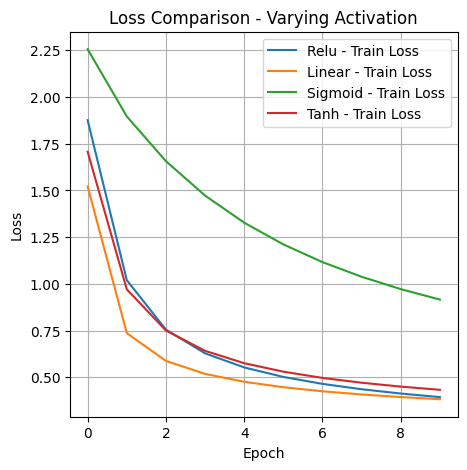

In [64]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    return accuracy

def plot_loss_comparison(histories, labels, title):
    plt.figure(figsize=(5, 5))
    for history, label in zip(histories, labels):
        plt.plot(history, label=f'{label} - Train Loss') 
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n=== Perbandingan Akurasi ===")
acc_1 = evaluate_model(modelRelu, X_test, y_test_encoded)
acc_2 = evaluate_model(modelLinear, X_test, y_test_encoded)
acc_3 = evaluate_model(modelSigmoid, X_test, y_test_encoded)
acc_4 = evaluate_model(modelTanh, X_test, y_test_encoded)

print("Variasi Aktivasi:")
print(f"Relu: {acc_1:.4f}")
print(f"Linear: {acc_2:.4f}")
print(f"Sigmoid: {acc_3:.4f}")
print(f"Tanh: {acc_4:.4f}")

histories = [historyAct1['train_loss'], historyAct2['train_loss'], historyAct3['train_loss'], historyAct4['train_loss']]
labels = ['Relu', 'Linear', 'Sigmoid', 'Tanh']

print("\n=== Grafik Loss ===")
plot_loss_comparison(histories, labels, 'Loss Comparison - Varying Activation')


### Pengaruh learning rate

In [62]:
modelLR001 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelLR005 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelLR01 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )


2025-03-18 02:17:45,974 - FFNN_1939573044624 - INFO - Logger initialized
2025-03-18 02:17:45,976 - FFNN_1939573044624 - INFO - Initializing FFNN with 3 layers: [784, 128, 10]
2025-03-18 02:17:45,976 - FFNN_1939573044624 - INFO - Activation functions: ['relu', 'softmax']
2025-03-18 02:17:45,978 - FFNN_1939573044624 - INFO - Loss function: categorical_crossentropy
2025-03-18 02:17:45,979 - FFNN_1939573044624 - INFO - Weight initialization method: he
2025-03-18 02:17:45,980 - FFNN_1939573044624 - INFO - Initializing weights using he method with params {'seed': 42}
2025-03-18 02:17:45,991 - FFNN_1939572951328 - INFO - Logger initialized
2025-03-18 02:17:45,993 - FFNN_1939572951328 - INFO - Initializing FFNN with 3 layers: [784, 128, 10]
2025-03-18 02:17:45,994 - FFNN_1939572951328 - INFO - Activation functions: ['relu', 'softmax']
2025-03-18 02:17:45,995 - FFNN_1939572951328 - INFO - Loss function: categorical_crossentropy
2025-03-18 02:17:45,996 - FFNN_1939572951328 - INFO - Weight initia

In [63]:
historyLR001 = modelLR001.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyLR005 = modelLR005.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.05,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyLR01 = modelLR01.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.1,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

2025-03-18 02:18:20,037 - FFNN_1939573044624 - INFO - Training started with 56000 samples, batch size: 32, learning rate: 0.01, epochs: 10
2025-03-18 02:18:20,038 - FFNN_1939573044624 - INFO - Epoch 1/10 started
2025-03-18 02:18:20,271 - FFNN_1939573044624 - INFO - Epoch 1, Batch 1/1750: loss = 2.599615, time = 0.005s
2025-03-18 02:18:20,826 - FFNN_1939573044624 - INFO - Epoch 1, Batch 176/1750: loss = 2.374618, time = 0.003s
2025-03-18 02:18:21,359 - FFNN_1939573044624 - INFO - Epoch 1, Batch 351/1750: loss = 2.194234, time = 0.003s
2025-03-18 02:18:21,887 - FFNN_1939573044624 - INFO - Epoch 1, Batch 526/1750: loss = 2.419441, time = 0.004s
2025-03-18 02:18:22,446 - FFNN_1939573044624 - INFO - Epoch 1, Batch 701/1750: loss = 2.168193, time = 0.003s
2025-03-18 02:18:22,995 - FFNN_1939573044624 - INFO - Epoch 1, Batch 876/1750: loss = 1.637535, time = 0.002s
2025-03-18 02:18:23,604 - FFNN_1939573044624 - INFO - Epoch 1, Batch 1051/1750: loss = 1.586957, time = 0.002s
2025-03-18 02:18:24

2025-03-18 02:24:54,558 - FFNN_1939573044624 - INFO - Predicting for 14000 samples
2025-03-18 02:24:54,728 - FFNN_1939573044624 - INFO - Prediction completed in 0.169s
2025-03-18 02:24:54,732 - FFNN_1939572951328 - INFO - Predicting for 14000 samples



=== Perbandingan Akurasi ===


2025-03-18 02:24:54,856 - FFNN_1939572951328 - INFO - Prediction completed in 0.122s
2025-03-18 02:24:54,860 - FFNN_1939572949648 - INFO - Predicting for 14000 samples
2025-03-18 02:24:54,996 - FFNN_1939572949648 - INFO - Prediction completed in 0.137s


Variasi Learning Rate:
0.01: 0.8906
0.05: 0.9355
0.1: 0.9490

=== Grafik Loss ===


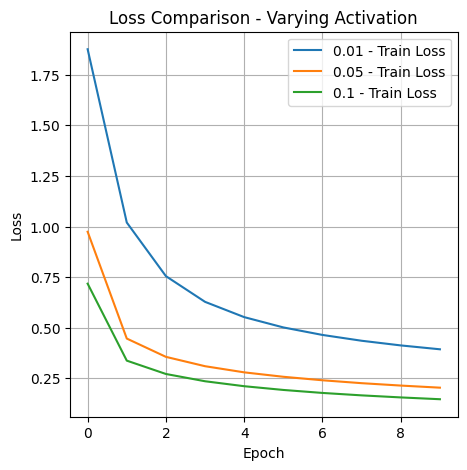

In [65]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    return accuracy

def plot_loss_comparison(histories, labels, title):
    plt.figure(figsize=(5, 5))
    for history, label in zip(histories, labels):
        plt.plot(history, label=f'{label} - Train Loss') 
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n=== Perbandingan Akurasi ===")
acc_1 = evaluate_model(modelLR001, X_test, y_test_encoded)
acc_2 = evaluate_model(modelLR005, X_test, y_test_encoded)
acc_3 = evaluate_model(modelLR01, X_test, y_test_encoded)

print("Variasi Learning Rate:")
print(f"0.01: {acc_1:.4f}")
print(f"0.05: {acc_2:.4f}")
print(f"0.1: {acc_3:.4f}")

histories = [historyLR001['train_loss'], historyLR005['train_loss'], historyLR01['train_loss']]
labels = ['0.01', '0.05', '0.1']

print("\n=== Grafik Loss ===")
plot_loss_comparison(histories, labels, 'Loss Comparison - Varying Activation')


### Pengaruh inisialisasi bobot

In [66]:
modelZeros = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='zeros'
    )

modelRandomUniform = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='random_uniform'
    )

modelRandomNormal = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='random_normal'
    )

modelHe = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelXavier = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='xavier'
    )

2025-03-18 02:28:52,528 - FFNN_1939569723728 - INFO - Logger initialized
2025-03-18 02:28:52,530 - FFNN_1939569723728 - INFO - Initializing FFNN with 3 layers: [784, 128, 10]
2025-03-18 02:28:52,531 - FFNN_1939569723728 - INFO - Activation functions: ['relu', 'softmax']
2025-03-18 02:28:52,532 - FFNN_1939569723728 - INFO - Loss function: categorical_crossentropy
2025-03-18 02:28:52,533 - FFNN_1939569723728 - INFO - Weight initialization method: zeros
2025-03-18 02:28:52,536 - FFNN_1939569723728 - INFO - Initializing weights using zeros method with params {'seed': 42}
2025-03-18 02:28:52,542 - FFNN_1939541281392 - INFO - Logger initialized
2025-03-18 02:28:52,543 - FFNN_1939541281392 - INFO - Initializing FFNN with 3 layers: [784, 128, 10]
2025-03-18 02:28:52,544 - FFNN_1939541281392 - INFO - Activation functions: ['relu', 'softmax']
2025-03-18 02:28:52,545 - FFNN_1939541281392 - INFO - Loss function: categorical_crossentropy
2025-03-18 02:28:52,546 - FFNN_1939541281392 - INFO - Weight 

In [67]:
historyZeros = modelZeros.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyRandomUniform = modelRandomUniform.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyRandomNormal = modelRandomNormal.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyXavier = modelXavier.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyHe = modelHe.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )


2025-03-18 02:31:01,806 - FFNN_1939569723728 - INFO - Training started with 56000 samples, batch size: 32, learning rate: 0.01, epochs: 10
2025-03-18 02:31:01,808 - FFNN_1939569723728 - INFO - Epoch 1/10 started
2025-03-18 02:31:02,073 - FFNN_1939569723728 - INFO - Epoch 1, Batch 1/1750: loss = 2.302585, time = 0.007s
2025-03-18 02:31:02,630 - FFNN_1939569723728 - INFO - Epoch 1, Batch 176/1750: loss = 2.302535, time = 0.002s
2025-03-18 02:31:03,188 - FFNN_1939569723728 - INFO - Epoch 1, Batch 351/1750: loss = 2.302448, time = 0.004s
2025-03-18 02:31:03,736 - FFNN_1939569723728 - INFO - Epoch 1, Batch 526/1750: loss = 2.302684, time = 0.003s
2025-03-18 02:31:04,291 - FFNN_1939569723728 - INFO - Epoch 1, Batch 701/1750: loss = 2.302514, time = 0.003s
2025-03-18 02:31:04,812 - FFNN_1939569723728 - INFO - Epoch 1, Batch 876/1750: loss = 2.302305, time = 0.004s
2025-03-18 02:31:05,334 - FFNN_1939569723728 - INFO - Epoch 1, Batch 1051/1750: loss = 2.302337, time = 0.002s
2025-03-18 02:31:05

2025-03-18 02:37:05,955 - FFNN_1939569723728 - INFO - Predicting for 14000 samples
2025-03-18 02:37:06,172 - FFNN_1939569723728 - INFO - Prediction completed in 0.215s



=== Perbandingan Akurasi ===


2025-03-18 02:37:06,175 - FFNN_1939541281392 - INFO - Predicting for 14000 samples
2025-03-18 02:37:06,313 - FFNN_1939541281392 - INFO - Prediction completed in 0.138s
2025-03-18 02:37:06,316 - FFNN_1939555188320 - INFO - Predicting for 14000 samples
2025-03-18 02:37:06,442 - FFNN_1939555188320 - INFO - Prediction completed in 0.125s
2025-03-18 02:37:06,445 - FFNN_1939569959344 - INFO - Predicting for 14000 samples
2025-03-18 02:37:06,577 - FFNN_1939569959344 - INFO - Prediction completed in 0.131s
2025-03-18 02:37:06,582 - FFNN_1939554591920 - INFO - Predicting for 14000 samples
2025-03-18 02:37:06,733 - FFNN_1939554591920 - INFO - Prediction completed in 0.151s


Variasi Inisiasi Bobot:
Zeros: 0.1143
Random Uniform: 0.8709
Random Normal: 0.8269
Xavier: 0.8921
He: 0.8902

=== Grafik Loss ===


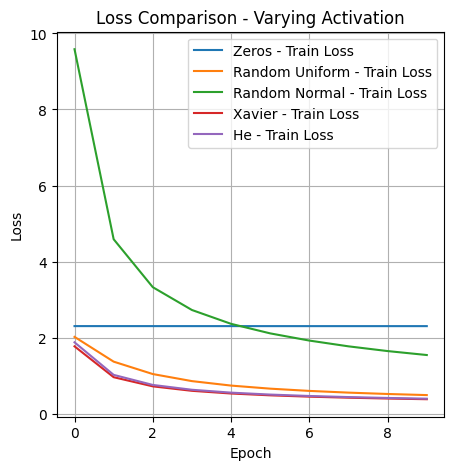

In [69]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    return accuracy

def plot_loss_comparison(histories, labels, title):
    plt.figure(figsize=(5, 5))
    for history, label in zip(histories, labels):
        plt.plot(history, label=f'{label} - Train Loss') 
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n=== Perbandingan Akurasi ===")
acc_1 = evaluate_model(modelZeros, X_test, y_test_encoded)
acc_2 = evaluate_model(modelRandomUniform, X_test, y_test_encoded)
acc_3 = evaluate_model(modelRandomNormal, X_test, y_test_encoded)
acc_4 = evaluate_model(modelXavier, X_test, y_test_encoded)
acc_5 = evaluate_model(modelHe, X_test, y_test_encoded)

print("Variasi Inisiasi Bobot:")
print(f"Zeros: {acc_1:.4f}")
print(f"Random Uniform: {acc_2:.4f}")
print(f"Random Normal: {acc_3:.4f}")
print(f"Xavier: {acc_4:.4f}")
print(f"He: {acc_5:.4f}")

histories = [historyZeros['train_loss'], historyRandomUniform['train_loss'], historyRandomNormal['train_loss'], historyXavier['train_loss'], historyHe['train_loss']]
labels = ['Zeros', 'Random Uniform', 'Random Normal', 'Xavier', 'He']

print("\n=== Grafik Loss ===")
plot_loss_comparison(histories, labels, 'Loss Comparison - Varying Activation')


### Perbandingan hasil prediksi dengan library sklearn MLP

In [86]:
hidden_layer_sizes = (64) 
activation = 'relu'       
learning_rate = 0.01           
batch_size = 32                
epochs = 10                    
random_state = 42              

ffnn_model = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[64],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='random_uniform'
    )

ffnn_history = ffnn_model.fit(
    X_train=X_train,
    y_train=y_train_encoded,
    batch_size=batch_size,
    learning_rate=learning_rate,
    epochs=epochs,
    X_val=X_test,
    y_val=y_test_encoded,
    verbose=0
)

sklearn_model = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,  
    activation=activation,                 
    learning_rate_init=learning_rate,       
    batch_size=batch_size,                 
    max_iter=epochs,                        
    random_state=random_state,              
    solver='sgd',                          
    verbose=False                            
)
sklearn_model.fit(X_train, y_train_original)

2025-03-18 03:03:11,213 - FFNN_1939572423568 - INFO - Logger initialized
2025-03-18 03:03:11,213 - FFNN_1939572423568 - INFO - Initializing FFNN with 3 layers: [784, 64, 10]
2025-03-18 03:03:11,214 - FFNN_1939572423568 - INFO - Activation functions: ['relu', 'softmax']
2025-03-18 03:03:11,215 - FFNN_1939572423568 - INFO - Loss function: categorical_crossentropy
2025-03-18 03:03:11,216 - FFNN_1939572423568 - INFO - Weight initialization method: random_uniform
2025-03-18 03:03:11,216 - FFNN_1939572423568 - INFO - Initializing weights using random_uniform method with params {'seed': 42}
2025-03-18 03:03:11,224 - FFNN_1939572423568 - INFO - Training started with 56000 samples, batch size: 32, learning rate: 0.01, epochs: 10
2025-03-18 03:03:11,225 - FFNN_1939572423568 - INFO - Epoch 1/10 started
2025-03-18 03:03:11,400 - FFNN_1939572423568 - INFO - Epoch 1, Batch 1/1750: loss = 2.515185, time = 0.003s
2025-03-18 03:03:11,713 - FFNN_1939572423568 - INFO - Epoch 1, Batch 176/1750: loss = 2.4

MLPClassifier(batch_size=32, hidden_layer_sizes=64, learning_rate_init=0.01,
              max_iter=10, random_state=42, solver='sgd')

In [87]:
def evaluate_model_ffnn(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    return accuracy

def evaluate_model_sklearn(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    return accuracy

print("\n=== Perbandingan Akurasi ===")
ffnn_accuracy = evaluate_model_ffnn(ffnn_model, X_test, y_test_encoded)
sklearn_accuracy = evaluate_model_sklearn(sklearn_model, X_test, y_test_original)

print(f"FFNN Accuracy: {ffnn_accuracy:.4f}")
print(f"sklearn MLP Accuracy: {sklearn_accuracy:.4f}")

2025-03-18 03:04:18,612 - FFNN_1939572423568 - INFO - Predicting for 14000 samples
2025-03-18 03:04:18,679 - FFNN_1939572423568 - INFO - Prediction completed in 0.067s



=== Perbandingan Akurasi ===
FFNN Accuracy: 0.8483
sklearn MLP Accuracy: 0.9678
